In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [4]:
wine = pd.read_csv('winequality-both.csv', sep=',', header=0)

In [6]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 열이름 전처리

In [11]:
wine.columns = wine.columns.str.replace(' ', '_')

In [12]:
wine.shape

(6497, 13)

In [13]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### 특정 열의 유일값 찾기

### quality : 선형통계 모델에서 예측하고자하는 선형값

In [14]:
wine.quality.unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [15]:
sorted(wine.quality.unique())

[3, 4, 5, 6, 7, 8, 9]

In [16]:
sorted(wine.type.unique())

['red', 'white']

### 빈도찾기

In [17]:
wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

---

### 와인 종류에 따른 기술통계를 출력하기 

In [18]:
wine['alcohol']

0        9.4
1        9.8
2        9.8
3        9.8
4        9.4
        ... 
6492    11.2
6493     9.6
6494     9.4
6495    12.8
6496    11.8
Name: alcohol, Length: 6497, dtype: float64

In [19]:
wine.head(1)

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
wine.groupby('type')[['alcohol']].describe()

alcohol                                                 
        count       mean       std  min  25%   50%   75%   max
type                                                          
red    1599.0  10.422983  1.065668  8.4  9.5  10.2  11.1  14.9
white  4898.0  10.514267  1.230621  8.0  9.5  10.4  11.4  14.2

### 특정 사분위수 값 확인
#### 타입별로 20%지점의 quality 값, 80%지점의 quality 값

In [26]:
wine.groupby('type')[['quality']].quantile([0.2, 0.8])

quality
type              
red   0.2      5.0
      0.8      6.0
white 0.2      5.0
      0.8      7.0

In [27]:
red_wine = wine.loc[wine['type']=='red', 'quality']
red_wine.head(10)

0    5
1    5
2    5
3    6
4    5
5    5
6    5
7    7
8    7
9    5
Name: quality, dtype: int64

In [28]:
white_wine = wine.loc[wine['type']=='white', 'quality']

C:\Users\tj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


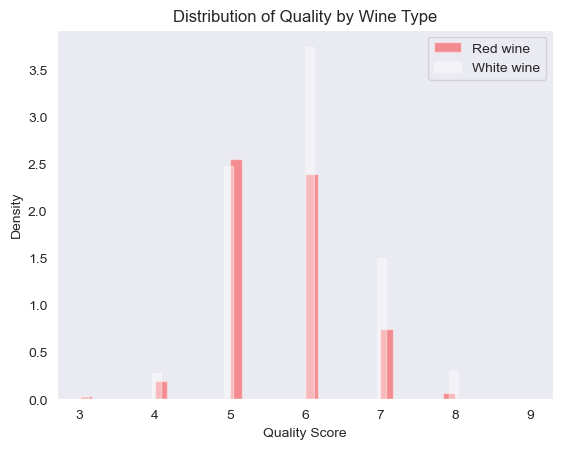

In [29]:
sns.set_style("dark")
sns.distplot(red_wine, norm_hist=True, kde=False, color="red", label="Red wine")
sns.distplot(white_wine, norm_hist=True, kde=False, color="white", label="White wine")
plt.xlabel("Quality Score")
plt.ylabel("Density")
plt.title("Distribution of Quality by Wine Type")
plt.legend()
plt.show()

### 와인 종류에 따른 품질의 차이 검정

In [30]:
wine.groupby(['type'])[['quality']].agg(['std', 'mean'])

quality          
            std      mean
type                     
red    0.807569  5.636023
white  0.885639  5.877909

### 레드와인과 화이트와인은 같은 종류의 데이터셋으로 볼 수 있는가?

### t-test (T검정)

In [34]:
tstat, pvalue, df = sm.stats.ttest_ind(red_wine, white_wine)

In [35]:
pvalue

4.888069044202279e-22

In [36]:
print('p-value: %.4f' %  pvalue)

p-value: 0.0000


#### pvalue: 유의확률 (통계값을 얼마나 신뢰할 수 있는가를 나타내는 지표)
#### pvalue가 0.05 보다 작으면 기무가설(두 표본과의 차이가 없다,유의 결과)를 기각할 수 있다.